**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [119]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic


from scipy import stats


The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [239]:
# %%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):
    def __init__(self, n_neighbors=5):
        self.k = n_neighbors
        self.n_block_size = 100

    def euclide(self, X):
        sqrX = (np.sum((X*1.) ** 2, axis=1)).reshape((-1, 1))
        dot = 2*np.dot(X*1., self.X.T)
        return np.sqrt(sqrX + self.sqrX - dot)

    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.X = X*1.
        self.y = y
        self.sqrX = np.sum(self.X ** 2, axis=1)

    def predict(self, X):
        y_pred = self.predict_proba(X*1.).argmax(axis=1)
        return y_pred

    def get_classproba(self, set_class):
        proba = np.zeros(self.n_classes, dtype=float)
        classes, counts = np.unique(self.y[set_class], return_counts=True)
        proba[classes.astype(int)] = counts
        return proba / np.sum(counts)

    def predict_proba(self, X):
        n_parts = X.shape[0] // self.n_block_size
        n_parts += 1 if (X.shape[0] % self.n_block_size != 0) else 0
        y_pred = np.zeros((X.shape[0], self.n_classes))
        nearest_neigh_pos = np.zeros((self.n_block_size, self.k), dtype=int)
        for i in range(n_parts):
            begin = i*self.n_block_size
            end = (begin + self.n_block_size) if i != n_parts-1 else X.shape[0]
            dist_batch = self.euclide(X[begin:end])
            nearest_neigh_pos = np.argpartition(
                dist_batch,
                self.k,
                axis=1
            )[:, :self.k]
            y_pred[begin:end] = np.apply_along_axis(
                self.get_classproba,
                1, nearest_neigh_pos
            )
        return y_pred.reshape((-1, self.n_classes))

    def score(self, X, y):
        y_pred = self.predict(X)
        y_len = y_pred.size * 1.
        acc = (y_len - np.count_nonzero(y_pred-y)) / y_len
        return acc

**IRIS**

In [240]:
iris = datasets.load_iris()

In [241]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.1, 
                                                    stratify=iris.target)

In [242]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [243]:
%time clf.fit(X_train, y_train)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.45 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [244]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 426 µs


In [245]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.74 ms


array([0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1])

In [246]:
%time my_clf.predict(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.86 ms


array([0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1])

In [247]:
%time print(clf.predict_proba(X_test))

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.44 ms


In [248]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 3.63 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [249]:
clf.score(X_test, y_test)

0.8666666666666667

In [250]:
my_clf.score(X_test, y_test)

0.8666666666666667

In [253]:
n_neighbors = 50
scores = np.empty(n_neighbors)
n_tests = 1000
for i in range(1,n_neighbors+1):
    sum_scrs = 0.
    for j in range(n_tests):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.1, 
                                                    stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        sum_scrs += my_clf.score(X_test, y_test)
    scores[i-1] = sum_scrs / n_tests

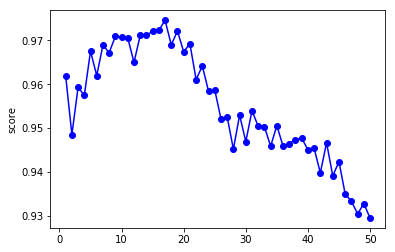

In [254]:
neigh = np.arange(1,n_neighbors+1)
plt.plot(neigh, scores, 'bo-')
plt.ylabel('score')
plt.show()

In [255]:
print(scores.argmax())
# лучшее значение при n_neighbors = 17

16


**MNIST**

In [137]:
mnist = fetch_mldata('MNIST original')

In [138]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [139]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [140]:
%time clf.fit(X_train, y_train)

CPU times: user 19.6 s, sys: 104 ms, total: 19.7 s
Wall time: 19.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [141]:
%time my_clf.fit(X_train, y_train)

CPU times: user 152 ms, sys: 52 ms, total: 204 ms
Wall time: 204 ms


In [109]:
%time clf.predict(X_test)

In [112]:
%time my_clf.predict(X_test)

CPU times: user 2min 31s, sys: 7.4 s, total: 2min 38s
Wall time: 45.7 s


0.9507142857142857

In [142]:
%time clf.predict_proba(X_test)

In [113]:
%time my_clf.predict_proba(X_test)

CPU times: user 2min 37s, sys: 8.06 s, total: 2min 45s
Wall time: 49.5 s


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin


# seaborn - для наглядной визуализации данных

# matplotlib - построение графиков

# train_test_split - для разбиения данных на тестовую и тренировочную выборки

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - для фиксирования последовательности 
# действий, которые можно применять к данным

# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормирование данных, 
# при котором среднее арифметическое равно 0, стандартное отклонение 1

# ClassifierMixin - базовый класс для всех классификаторов

# NeighborsBase - базовый класс для класса k ближайщих соседей (внутри есть _init_params и _fit)

# KNeighborsMixin - содержит метод kneighbors для поиска k ближайщих соседей

# SupervisedIntegerMixin - содержит метод fit